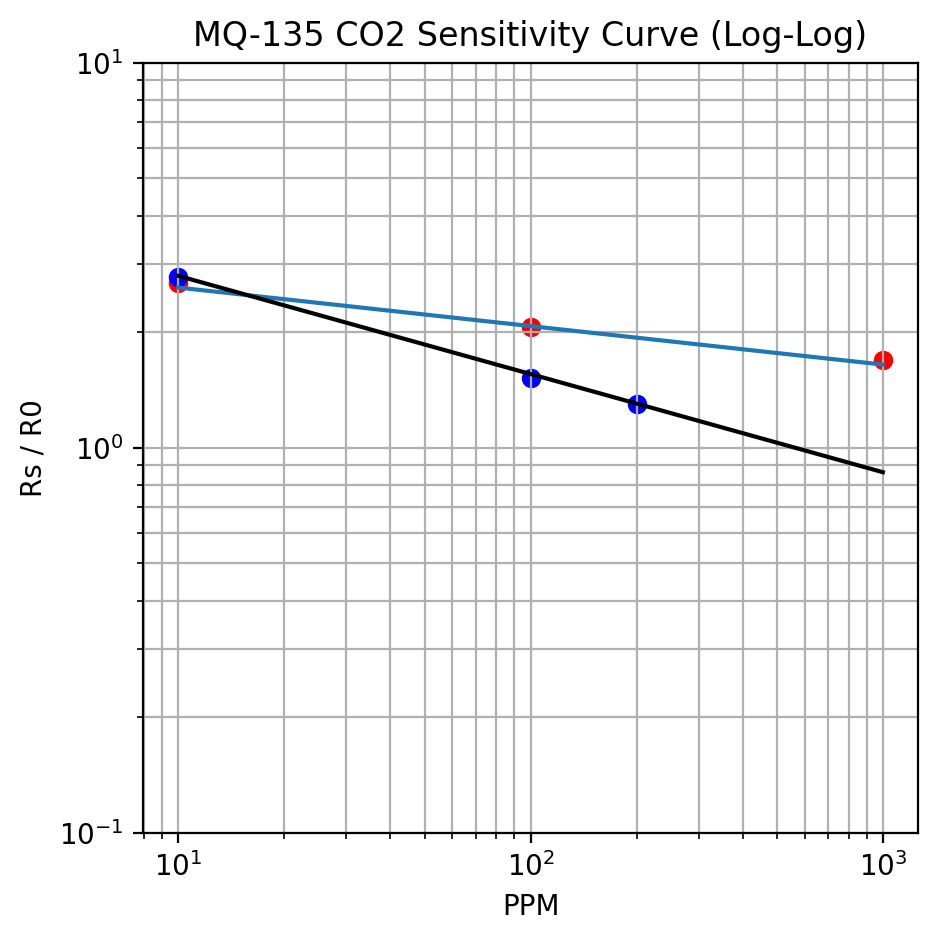

In [17]:
import numpy as np
import matplotlib.pyplot as plt

heightlist = np.array([5,4.6,4.3])
value = (heightlist - 3.5)/3.5

xpos = 10**np.array([1,2,3])
ypos = 10**value 

xpos2 = np.array([10,100,200])
ypos2 = 10**((np.array([1.95, 0.8,0.5]))/4.4)

# Example data: CO2 curve using Rs/R0 = (ppm / 400)^(-0.38)
ppm = np.logspace(1, 3, 500)   # 10 to 1000 ppm
rsro = 1.8*(ppm / 400.0) ** (-0.1)
rsro2 = 1.09*(ppm/400.0) ** (-0.255)
plt.figure(figsize=(5,5),dpi=200)
plt.loglog(ppm, rsro)
plt.loglog(ppm, rsro2, 'k-')
plt.xlabel("PPM")
plt.ylabel("Rs / R0")
plt.ylim(0.1,10)
plt.scatter(xpos,ypos,color='r')
plt.scatter(xpos2,ypos2,color='b')
plt.title("MQ-135 CO2 Sensitivity Curve (Log-Log)")
plt.grid(True, which="both")

plt.show()

C:\Users\verci\AppData\Local\Temp\ipykernel_8368\1837888821.py:23: RuntimeWarning: divide by zero encountered in divide
  rsro = 1.8 / (ppm / 400.0) ** 0.1


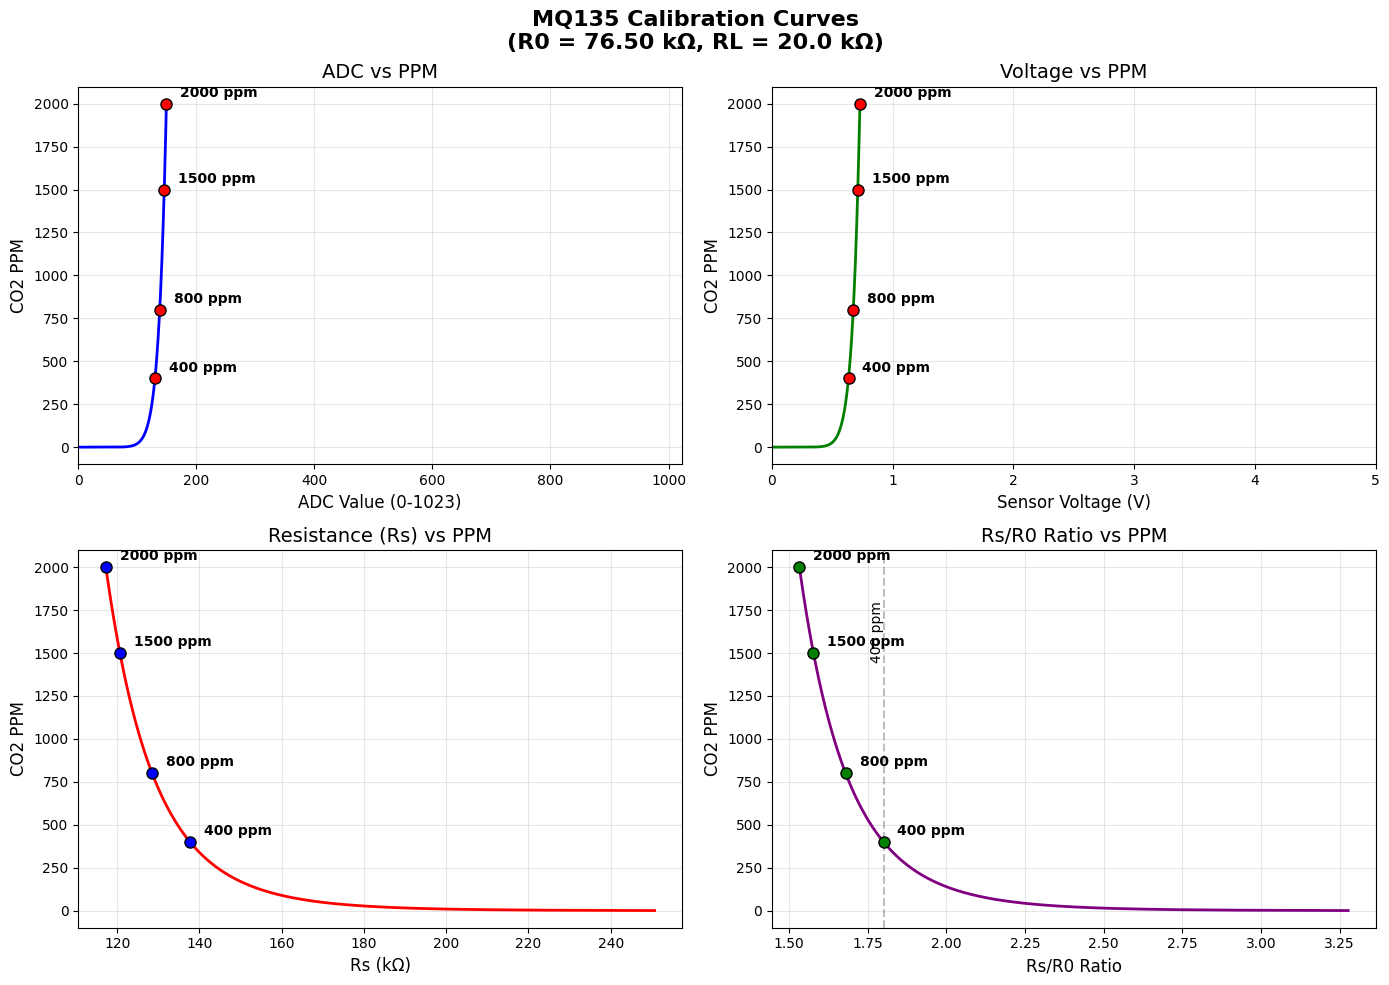


CALIBRATION TABLE
   PPM |    ADC | Voltage (V) |  Rs (kΩ) |  Rs/R0
------------------------------------------------------------
   400 |    129 |      0.634 |    137.7 |  1.800
   450 |    131 |      0.641 |    136.1 |  1.779
   800 |    137 |      0.674 |    128.5 |  1.679
  1500 |    145 |      0.711 |    120.7 |  1.577
  2000 |    149 |      0.729 |    117.2 |  1.532

EXAMPLE CONVERSIONS

For 400 ppm (Rs/R0 = 1.8):
  ADC: 129
  Voltage: 0.633 V
  Rs: 137.93 kΩ
  Rs/R0: 1.800

For ADC = 300:
  Voltage: 1.466 V
  Rs: 48.20 kΩ
  Rs/R0: 0.629
  PPM: 14733397.8

For Voltage = 2.0V:
  ADC: 409
  Rs: 30.00 kΩ
  Rs/R0: 0.391
  PPM: 1688732069.1


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def plot_calibration_curves(R0=76.63, RL=20.0):
    """
    Plot calibration curves for MQ135 sensor showing four different relationships.
    
    Parameters:
    -----------
    R0 : float
        Reference resistance in kΩ (default 76.63)
    RL : float
        Load resistance in kΩ (default 20.0)
    """
    
    # Generate PPM values from 100 to 2000 ppm
    ppm = np.linspace(0, 2000, 2000)
    
    # Calculate corresponding values for each relationship
    # Using your formula: ppm = 400 * (1.8 / (Rs/R0))^10
    # Rearrange to get Rs/R0 = 1.8 / (ppm/400)^(0.1)
    rsro = 1.8 / (ppm / 400.0) ** 0.1
    
    # Calculate Rs from Rs/R0 ratio
    rs = rsro * R0
    
    # Calculate voltage from Rs
    # V_sensor = Vcc * RL / (Rs + RL)
    voltage = 5.0 * RL / (rs + RL)
    
    # Calculate ADC from voltage (assuming 10-bit ADC, 5V reference)
    adc = voltage * 1023.0 / 5.0
    
    # Limit ADC to valid range
    adc = np.clip(adc, 0, 1023)
    
    # Create figure with 2x2 subplots
    fig = plt.figure(figsize=(14, 10))
    fig.suptitle('MQ135 Calibration Curves\n(R0 = {:.2f} kΩ, RL = {:.1f} kΩ)'.format(R0, RL), 
                 fontsize=16, fontweight='bold')
    
    # Plot 1: ADC vs PPM
    ax1 = plt.subplot(221)
    ax1.plot(adc, ppm, 'b-', linewidth=2)
    ax1.set_xlabel('ADC Value (0-1023)', fontsize=12)
    ax1.set_ylabel('CO2 PPM', fontsize=12)
    ax1.set_title('ADC vs PPM', fontsize=14)
    ax1.grid(True, alpha=0.3)
    ax1.set_xlim(0, 1023)
    
    # Mark key points
    key_ppm = [400, 800, 1500, 2000]
    for p in key_ppm:
        if p <= 2000:
            idx = np.abs(ppm - p).argmin()
            ax1.plot(adc[idx], p, 'ro', markersize=8, markeredgecolor='k')
            ax1.annotate(f'{p} ppm', (adc[idx], p), 
                        xytext=(10, 5), textcoords='offset points',
                        fontsize=10, fontweight='bold')
    
    # Plot 2: Voltage vs PPM
    ax2 = plt.subplot(222)
    ax2.plot(voltage, ppm, 'g-', linewidth=2)
    ax2.set_xlabel('Sensor Voltage (V)', fontsize=12)
    ax2.set_ylabel('CO2 PPM', fontsize=12)
    ax2.set_title('Voltage vs PPM', fontsize=14)
    ax2.grid(True, alpha=0.3)
    ax2.set_xlim(0, 5)
    
    # Mark key points
    for p in key_ppm:
        if p <= 2000:
            idx = np.abs(ppm - p).argmin()
            ax2.plot(voltage[idx], p, 'ro', markersize=8, markeredgecolor='k')
            ax2.annotate(f'{p} ppm', (voltage[idx], p), 
                        xytext=(10, 5), textcoords='offset points',
                        fontsize=10, fontweight='bold')
    
    # Plot 3: Rs vs PPM
    ax3 = plt.subplot(223)
    ax3.plot(rs, ppm, 'r-', linewidth=2)
    ax3.set_xlabel('Rs (kΩ)', fontsize=12)
    ax3.set_ylabel('CO2 PPM', fontsize=12)
    ax3.set_title('Resistance (Rs) vs PPM', fontsize=14)
    ax3.grid(True, alpha=0.3)
    
    # Mark key points
    for p in key_ppm:
        if p <= 2000:
            idx = np.abs(ppm - p).argmin()
            ax3.plot(rs[idx], p, 'bo', markersize=8, markeredgecolor='k')
            ax3.annotate(f'{p} ppm', (rs[idx], p), 
                        xytext=(10, 5), textcoords='offset points',
                        fontsize=10, fontweight='bold')
    
    # Plot 4: Rs/R0 vs PPM
    ax4 = plt.subplot(224)
    ax4.plot(rsro, ppm, 'purple', linewidth=2)
    ax4.set_xlabel('Rs/R0 Ratio', fontsize=12)
    ax4.set_ylabel('CO2 PPM', fontsize=12)
    ax4.set_title('Rs/R0 Ratio vs PPM', fontsize=14)
    ax4.grid(True, alpha=0.3)
    
    # Add reference lines for key ratios
    ax4.axvline(x=1.8, color='gray', linestyle='--', alpha=0.5)
    ax4.text(1.8, 1800, '400 ppm', rotation=90, va='top', ha='right')
    
    # Mark key points
    for p in key_ppm:
        if p <= 2000:
            idx = np.abs(ppm - p).argmin()
            ax4.plot(rsro[idx], p, 'go', markersize=8, markeredgecolor='k')
            ax4.annotate(f'{p} ppm', (rsro[idx], p), 
                        xytext=(10, 5), textcoords='offset points',
                        fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Print calibration table
    print("\n" + "="*60)
    print("CALIBRATION TABLE")
    print("="*60)
    print(f"{'PPM':>6} | {'ADC':>6} | {'Voltage (V)':>10} | {'Rs (kΩ)':>8} | {'Rs/R0':>6}")
    print("-"*60)
    
    table_ppm = [400, 450, 800, 1500, 2000]
    for p in table_ppm:
        idx = np.abs(ppm - p).argmin()
        print(f"{p:6d} | {int(adc[idx]):6d} | {voltage[idx]:10.3f} | {rs[idx]:8.1f} | {rsro[idx]:6.3f}")
    
    print("="*60)

# Helper function to convert between values
def convert_values(adc_value=None, voltage=None, rs=None, rsro=None, R0=76.63, RL=20.0):
    """
    Convert between different sensor values.
    
    Parameters:
    -----------
    adc_value : int or None
        ADC value (0-1023)
    voltage : float or None
        Sensor voltage (0-5V)
    rs : float or None
        Sensor resistance in kΩ
    rsro : float or None
        Rs/R0 ratio
    R0 : float
        Reference resistance in kΩ
    RL : float
        Load resistance in kΩ
    
    Returns:
    --------
    dict : Dictionary with all calculated values
    """
    
    # Convert whatever we have to voltage first
    if voltage is None:
        if adc_value is not None:
            voltage = adc_value * 5.0 / 1023.0
        elif rs is not None:
            voltage = 5.0 * RL / (rs + RL)
        elif rsro is not None:
            rs = rsro * R0
            voltage = 5.0 * RL / (rs + RL)
        else:
            raise ValueError("Must provide at least one value")
    
    # Calculate everything from voltage
    adc = voltage * 1023.0 / 5.0 if adc_value is None else adc_value
    rs_calc = ((5.0 / voltage) - 1.0) * RL if rs is None else rs
    rsro_calc = rs_calc / R0 if rsro is None else rsro
    
    # Calculate PPM from your formula
    ppm = 400.0 * (1.8 / rsro_calc) ** 10.0
    
    return {
        'adc': int(adc),
        'voltage': voltage,
        'rs': rs_calc,
        'rsro': rsro_calc,
        'ppm': ppm
    }

# Example usage
if __name__ == "__main__":
    # Plot all calibration curves
    plot_calibration_curves(R0=76.5)
    
    # Example conversions
    print("\n" + "="*60)
    print("EXAMPLE CONVERSIONS")
    print("="*60)
    
    # What ADC gives 400 ppm?
    result_400 = convert_values(rsro=1.8)
    print(f"\nFor 400 ppm (Rs/R0 = 1.8):")
    print(f"  ADC: {result_400['adc']}")
    print(f"  Voltage: {result_400['voltage']:.3f} V")
    print(f"  Rs: {result_400['rs']:.2f} kΩ")
    print(f"  Rs/R0: {result_400['rsro']:.3f}")
    
    # What if we measure 300 ADC?
    result_adc300 = convert_values(adc_value=300)
    print(f"\nFor ADC = 300:")
    print(f"  Voltage: {result_adc300['voltage']:.3f} V")
    print(f"  Rs: {result_adc300['rs']:.2f} kΩ")
    print(f"  Rs/R0: {result_adc300['rsro']:.3f}")
    print(f"  PPM: {result_adc300['ppm']:.1f}")
    
    # What if we measure 2.0V?
    result_2v = convert_values(voltage=2.0)
    print(f"\nFor Voltage = 2.0V:")
    print(f"  ADC: {result_2v['adc']}")
    print(f"  Rs: {result_2v['rs']:.2f} kΩ")
    print(f"  Rs/R0: {result_2v['rsro']:.3f}")
    print(f"  PPM: {result_2v['ppm']:.1f}")

C:\Users\verci\AppData\Local\Temp\ipykernel_8368\498130030.py:29: RuntimeWarning: divide by zero encountered in divide
  rsro = 1.8 / (ppm / 400.0) ** 0.1


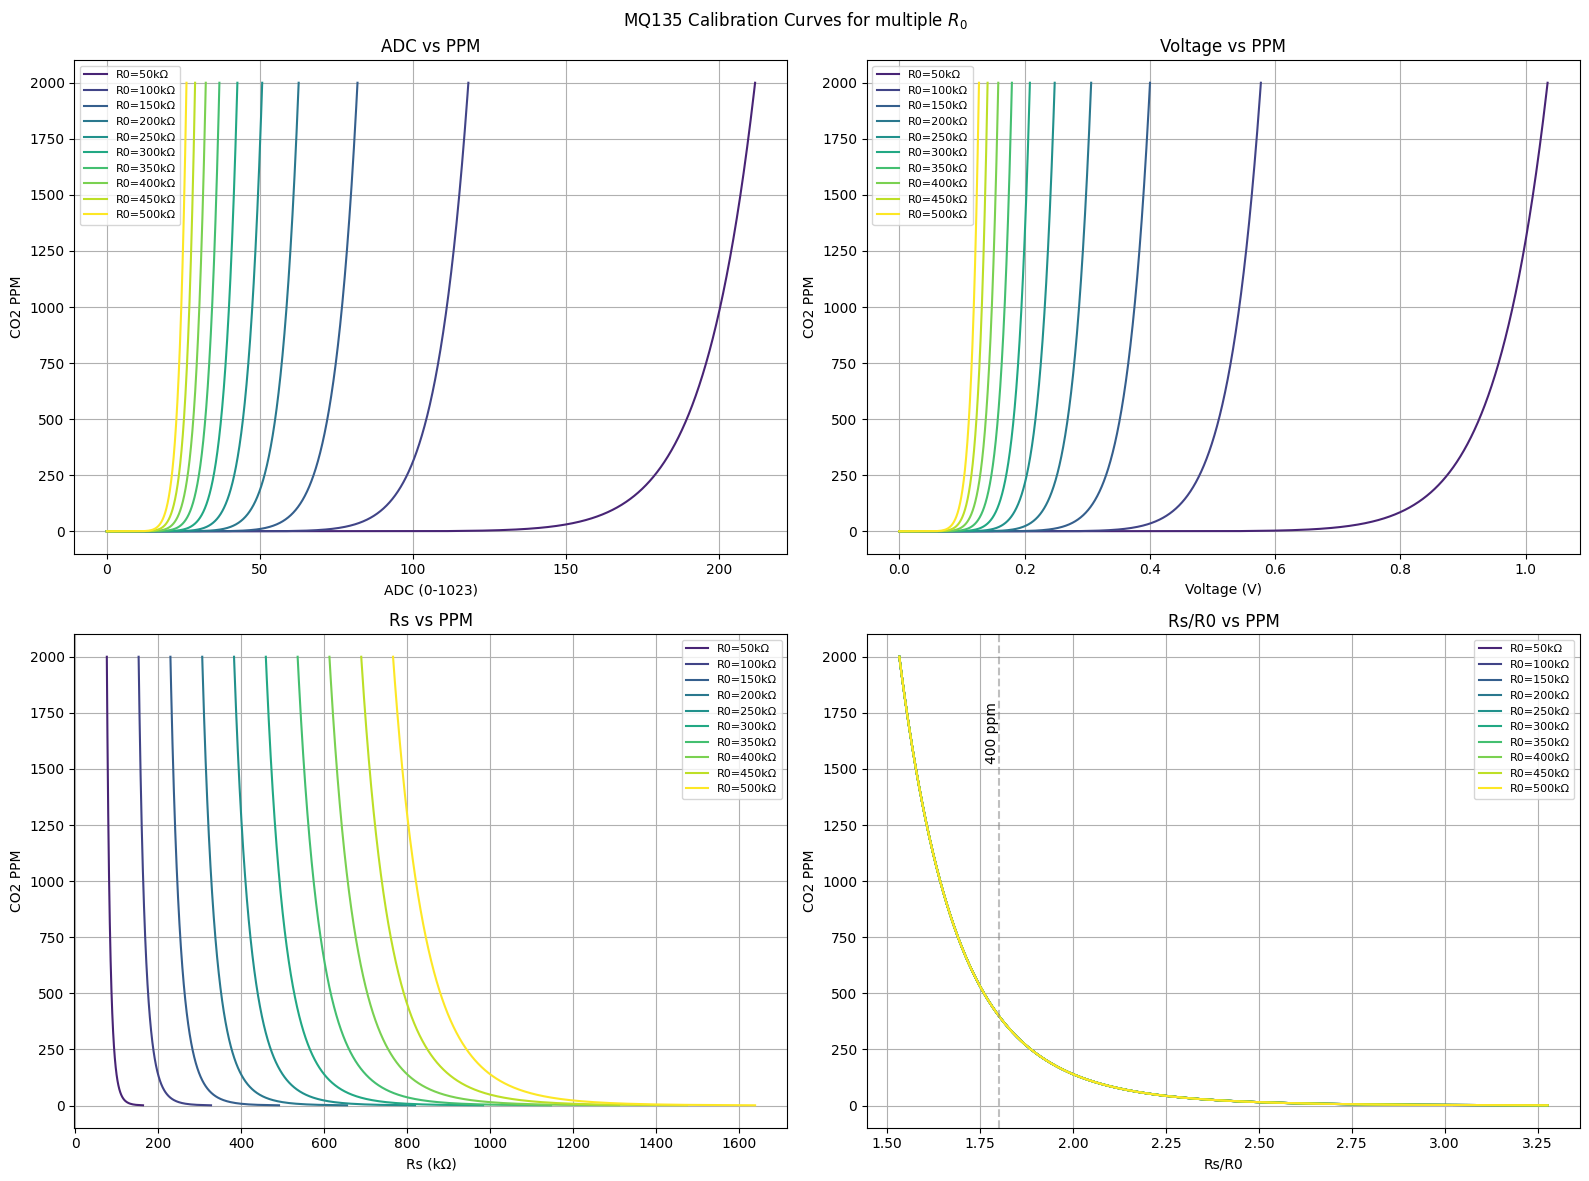

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def plot_multi_R0_calibration(R0_values=np.arange(0, 501, 50), RL=20.0):
    """
    Plot MQ135 calibration curves for multiple R0 values.
    
    Parameters
    ----------
    R0_values : array-like
        List of R0 values (kΩ) to generate calibration curves for.
    RL : float
        Load resistance in kΩ (default 20.0)
    """
    ppm = np.linspace(0, 2000, 2000)  # PPM range
    key_ppm = [400, 450, 800, 1500, 2000]

    # Prepare figure
    fig, axs = plt.subplots(2, 2, figsize=(16, 12))
    axs = axs.flatten()

    colors = plt.cm.viridis(np.linspace(0, 1, len(R0_values)))  # Color map

    for i, R0 in enumerate(R0_values):
        if R0 == 0:
            continue  # Skip R0=0 to avoid division by zero

        # Rs/R0 ratio
        rsro = 1.8 / (ppm / 400.0) ** 0.1
        rs = rsro * R0
        voltage = 5.0 * RL / (rs + RL)
        adc = voltage * 1023.0 / 5.0
        adc = np.clip(adc, 0, 1023)

        # Plot ADC vs PPM
        axs[0].plot(adc, ppm, label=f'R0={R0:.0f}kΩ', color=colors[i])
        axs[1].plot(voltage, ppm, label=f'R0={R0:.0f}kΩ', color=colors[i])
        axs[2].plot(rs, ppm, label=f'R0={R0:.0f}kΩ', color=colors[i])
        axs[3].plot(rsro, ppm, label=f'R0={R0:.0f}kΩ', color=colors[i])

    # Set axes titles and labels
    axs[0].set_title('ADC vs PPM'); axs[0].set_xlabel('ADC (0-1023)'); axs[0].set_ylabel('CO2 PPM'); axs[0].grid(True)
    axs[1].set_title('Voltage vs PPM'); axs[1].set_xlabel('Voltage (V)'); axs[1].set_ylabel('CO2 PPM'); axs[1].grid(True)
    axs[2].set_title('Rs vs PPM'); axs[2].set_xlabel('Rs (kΩ)'); axs[2].set_ylabel('CO2 PPM'); axs[2].grid(True)
    axs[3].set_title('Rs/R0 vs PPM'); axs[3].set_xlabel('Rs/R0'); axs[3].set_ylabel('CO2 PPM'); axs[3].grid(True)

    # Reference line at Rs/R0 = 1.8 for 400 ppm
    axs[3].axvline(x=1.8, color='gray', linestyle='--', alpha=0.5)
    axs[3].text(1.8, 1800, '400 ppm', rotation=90, va='top', ha='right')

    for ax in axs:
        ax.legend(fontsize=8)
    plt.suptitle("MQ135 Calibration Curves for multiple $R_0$")
    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    plot_multi_R0_calibration()


C:\Users\verci\AppData\Local\Temp\ipykernel_15620\144223015.py:29: RuntimeWarning: divide by zero encountered in power
  rsro = 1.09 * (ppm / 400.0) ** (-0.255)


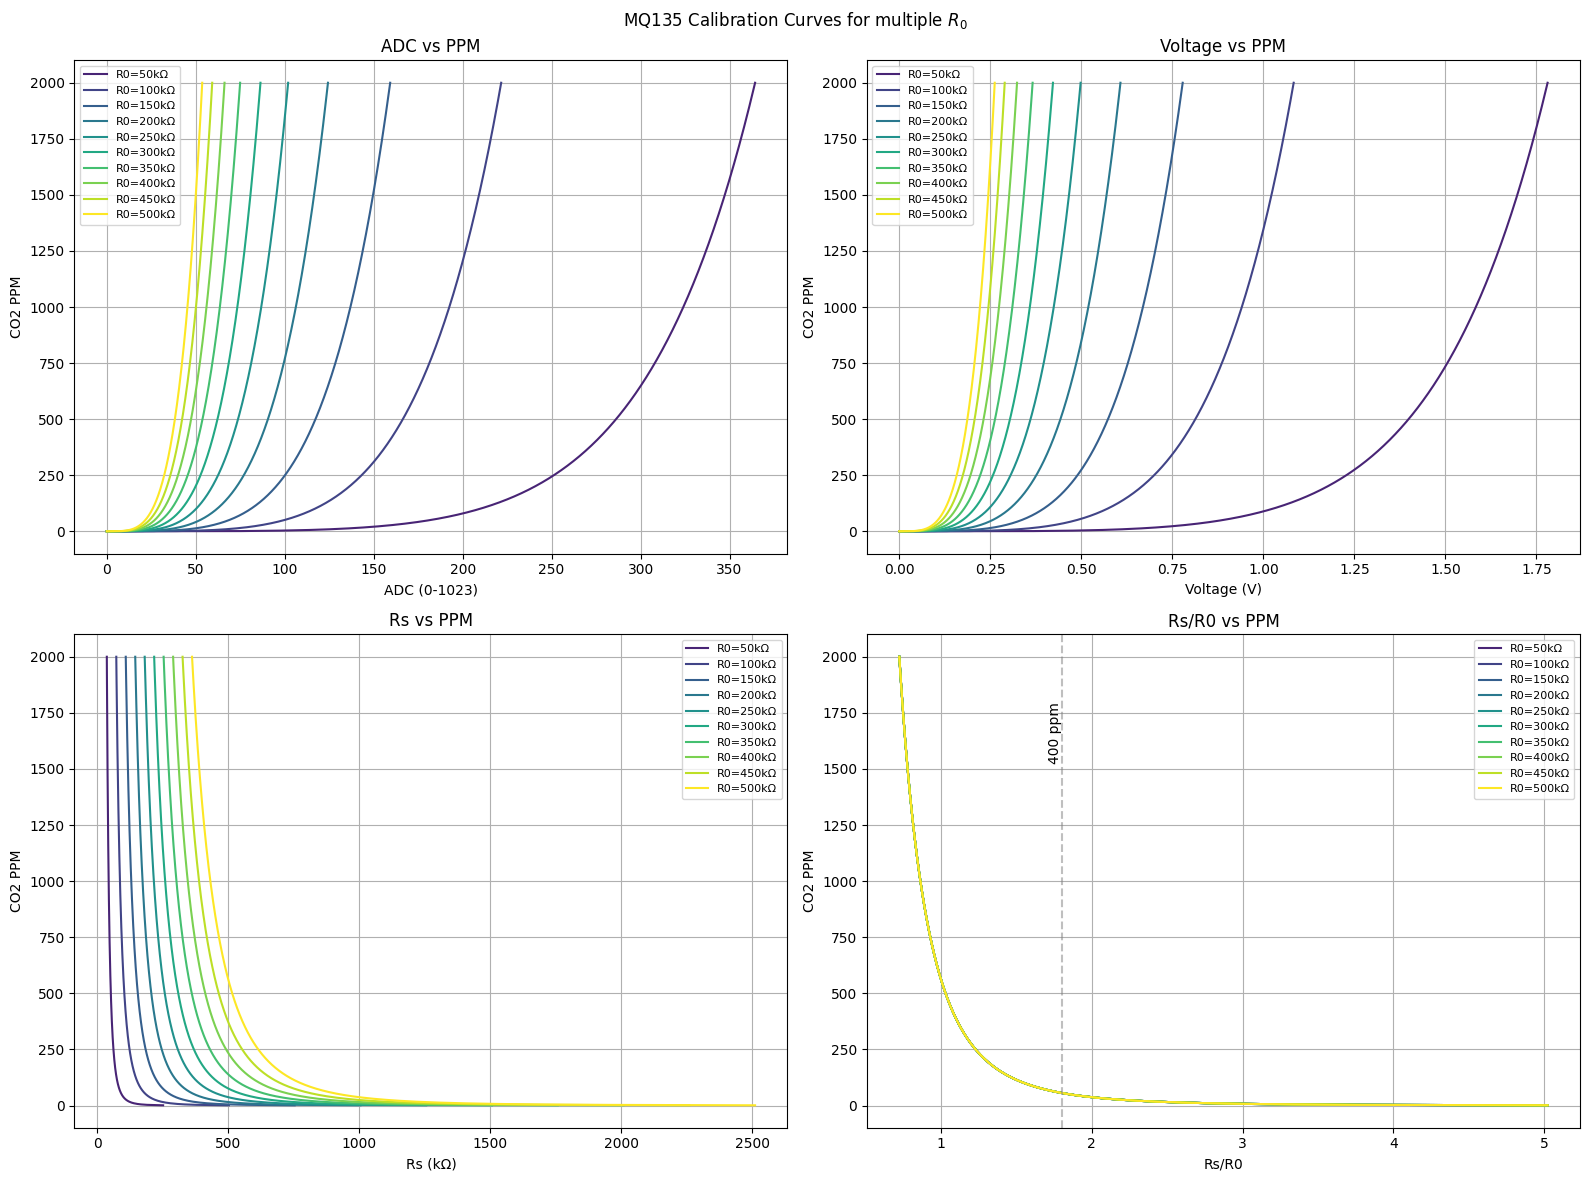

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def plot_multi_R0_calibration(R0_values=np.arange(0, 501, 50), RL=20.0):
    """
    Plot MQ135 calibration curves for multiple R0 values.
    
    Parameters
    ----------
    R0_values : array-like
        List of R0 values (kΩ) to generate calibration curves for.
    RL : float
        Load resistance in kΩ (default 20.0)
    """
    ppm = np.linspace(0, 2000, 2000)  # PPM range
    key_ppm = [400, 450, 800, 1500, 2000]

    # Prepare figure
    fig, axs = plt.subplots(2, 2, figsize=(16, 12))
    axs = axs.flatten()

    colors = plt.cm.viridis(np.linspace(0, 1, len(R0_values)))  # Color map

    for i, R0 in enumerate(R0_values):
        if R0 == 0:
            continue  # Skip R0=0 to avoid division by zero

        # Rs/R0 ratio
        rsro = 1.09 * (ppm / 400.0) ** (-0.255)
        rs = rsro * R0
        voltage = 5.0 * RL / (rs + RL)
        adc = voltage * 1023.0 / 5.0
        adc = np.clip(adc, 0, 1023)

        # Plot ADC vs PPM
        axs[0].plot(adc, ppm, label=f'R0={R0:.0f}kΩ', color=colors[i])
        axs[1].plot(voltage, ppm, label=f'R0={R0:.0f}kΩ', color=colors[i])
        axs[2].plot(rs, ppm, label=f'R0={R0:.0f}kΩ', color=colors[i])
        axs[3].plot(rsro, ppm, label=f'R0={R0:.0f}kΩ', color=colors[i])

    # Set axes titles and labels
    axs[0].set_title('ADC vs PPM'); axs[0].set_xlabel('ADC (0-1023)'); axs[0].set_ylabel('CO2 PPM'); axs[0].grid(True)
    axs[1].set_title('Voltage vs PPM'); axs[1].set_xlabel('Voltage (V)'); axs[1].set_ylabel('CO2 PPM'); axs[1].grid(True)
    axs[2].set_title('Rs vs PPM'); axs[2].set_xlabel('Rs (kΩ)'); axs[2].set_ylabel('CO2 PPM'); axs[2].grid(True)
    axs[3].set_title('Rs/R0 vs PPM'); axs[3].set_xlabel('Rs/R0'); axs[3].set_ylabel('CO2 PPM'); axs[3].grid(True)

    # Reference line at Rs/R0 = 1.8 for 400 ppm
    axs[3].axvline(x=1.8, color='gray', linestyle='--', alpha=0.5)
    axs[3].text(1.8, 1800, '400 ppm', rotation=90, va='top', ha='right')

    for ax in axs:
        ax.legend(fontsize=8)
    plt.suptitle("MQ135 Calibration Curves for multiple $R_0$")
    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    plot_multi_R0_calibration()